2016-04-15T15:41:45.000000000-0400
       speeds  speeds_old
0    0.000000    0.516667
1    0.000000    0.000000
2    0.000000    0.315000
3    0.000000    0.000000
4    0.000000    0.306667
5    0.000000    0.000000
6    0.000000    0.000000
7    0.000000    0.000000
8    0.000000    0.000000
9    0.000000    0.100000
10   0.000000    0.844444
11   0.000000    0.200000
12   0.000000    0.000000
13   0.000000    0.000000
14   0.000000    0.000000
15   0.000000    0.000000
16   0.000000    0.844000
17   0.000000    1.385714
18   0.000000    1.366667
19   0.000000    1.375000
20   0.000000    1.366667
21   0.000000    1.380000
22   0.000000    0.754545
23   1.223489    0.575000
24   1.167876    1.200000
25   1.384149    1.422222
26   1.406218    1.407143
27   1.260564    1.300000
28   0.639551    0.750000
29   1.067772    1.240000
..        ...         ...
790  0.222453    0.100000
791  0.139033    0.025000
792  0.086509    0.022222
793  0.087810    0.552632
794  0.148302    1.400000
795

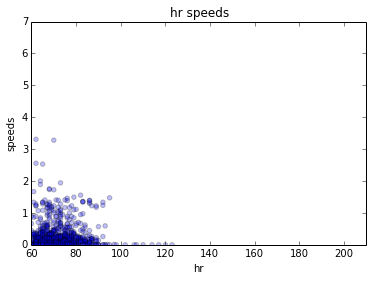

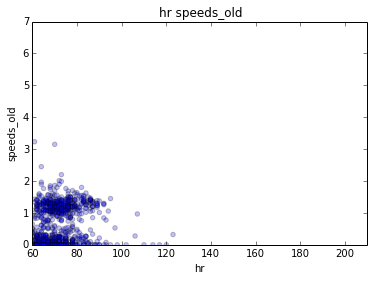

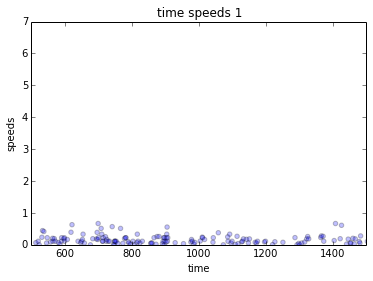

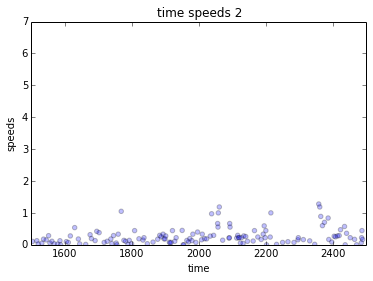

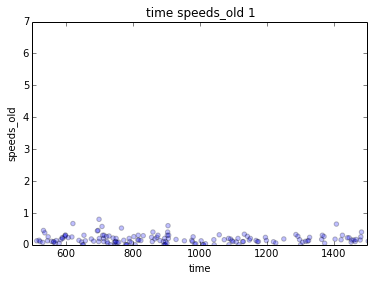

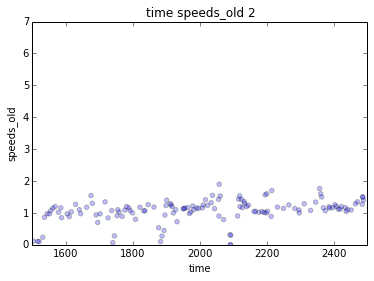

0.0137931034483
fitline


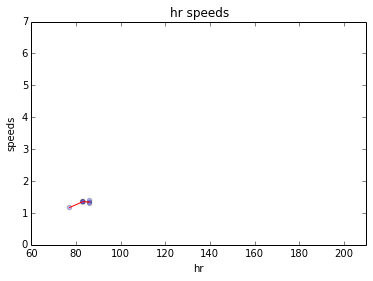

fitline


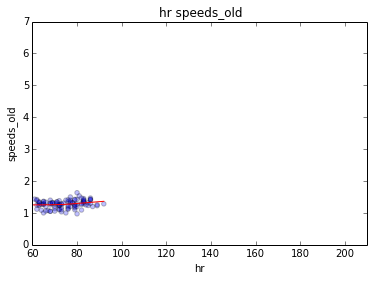

'\ndf = df[df.speed_diff < .25]\n\nprint(len(df))\n\n\nACCESS_TOKEN = \'1a253e9fdc49c806f1c052d791b7e26ebeb04a8b\'\n\nclient = Client(access_token=ACCESS_TOKEN)\n\nathlete = client.get_athlete() # Get current athlete details\n\nprint(athlete.firstname)\n\nactivity = client.get_activity_streams(438441582)\n\nactivities = client.get_activities()\n\nsage = client.get_athlete(1595767)\n\nprint(sage.firstname)\nprint(sage.city)\n\nprint(sage.get_activities())\n\nprint(athlete.id)\n\nactivities = list(client.get_activities())\n\ndf = thresher.masterAssemble(client) \ndf.to_pickle("master_dfs/"+str(athlete.id)+"masterDf.txt")\n\n\npath = os.path.dirname(__file__)\n    \ndf = pd.read_pickle(str(path)+"/master_dfs/"+str(athlete.id)+"masterDf.txt")\n\n\n\nr = df[df.activityId == 466777343].loc[:,[\'latlng\', \'hr\', \'speeds\', \'speedDelta3Abs\', \'altDeltas\', \'time\', \'distCum\']]\nr_json = r.to_json(orient="records")\n\nprint(r)\n\n\n\nfor i in range(len(activities)):\n    if float(activit

In [10]:
# %load stravaTest.py
from stravalib import Client
import webbrowser, pickle, copy
#import urllib3.contrib.pyopenssl
from urllib2 import urlopen
from json import load, dumps
#import thresher
import pandas as pd
import datetime, os
from pandas import DataFrame, pivot_table
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import thresher
from math import radians, cos, sin, asin, sqrt
#urllib3.contrib.pyopenssl.inject_into_urllib3()


################# 
# Defining functions for use in testing

# plot 1: hr-speed explorer
def plotScat(df, x, y):
    #x = 'hr'
    #y = 'speeds'
    #y2 = 'speedHat'
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.scatter(df[x], df[y], c='blue', alpha=0.25)
    #ax.scatter(df[x], df[y2], c='red', alpha=0.25)
    ax.set_title(str(x)+' '+str(y))  
    ax.set_ylabel(str(y))
    ax.set_xlabel(str(x))
    ax.set_ylim([0,7])
    ax.set_xlim([60,210])
    #ax.legend([y, y2])
    plt.show()
    fig.clf()
   
def plotSpeedTime(df, x, y):
    #x = 'hr'
    #y = 'speeds'
    #y2 = 'speedHat'
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.scatter(df[x], df[y], c='blue', alpha=0.25)
    #ax.scatter(df[x], df[y2], c='red', alpha=0.25)
    ax.set_title(str(x)+' '+str(y)+' 1')  
    ax.set_ylabel(str(y))
    ax.set_xlabel(str(x))
    ax.set_ylim([0,7])
    ax.set_xlim([500,1500])
    #ax.legend([y, y2])
    plt.show()
    fig.clf() 
    
    
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.scatter(df[x], df[y], c='blue', alpha=0.25)
    #ax.scatter(df[x], df[y2], c='red', alpha=0.25)
    ax.set_title(str(x)+' '+str(y)+' 2')  
    ax.set_ylabel(str(y))
    ax.set_xlabel(str(x))
    ax.set_ylim([0,7])
    ax.set_xlim([1500,2500])
    #ax.legend([y, y2])
    plt.show()
    fig.clf() 

""" Lowess smoothed speed-time
x = 'time'
y = 'speeds'
#y2 = 'speedHat'
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(df[x], df[y], c='blue', alpha=0.25)
#ax.scatter(df[x], df[y2], c='red', alpha=0.25)
ax.plot(df['speedLwsX'], df['speedLwsY'], c='blue')
#ax.plot(lwsHatX, lwsHatY, c='red')
ax.set_title(str(x)+' '+str(y))  
ax.set_ylabel(str(y))
ax.set_xlabel(str(x))
ax.set_ylim([0,6])
ax.set_xlim([0, 1500])
#ax.legend([y, y2])
plt.show()
fig.clf()
"""

#############################################
# All the above are for normal df (just cleaned). Below is for gauging fitness

# Preparing df for getting Lws.
def getFitlinesLwsDf(df, speedMeasure):
  
    #df = df[df.cadence>0]
    #df = df[(df.hrRes < 3.0) & (df.speedRes < 3.0)]
    
    for i in range(1,10):
        df[speedMeasure+'_shift'+str(i)] = df[speedMeasure].shift(i)    
        
    threshhold = .25
    #print(len(df))
    for i in range(1,10):
        dif = speedMeasure+'_diff'+str(i)
        df[dif] = np.abs(df[speedMeasure] - df[speedMeasure+'_shift'+str(i)]) / df[speedMeasure]

    df = df[(df[speedMeasure+str('_diff7')] < threshhold) & (df[speedMeasure+str('_diff6')] < threshhold) & (df[speedMeasure+str('_diff5')] < threshhold) & (df[speedMeasure+str('_diff4')] < threshhold) & (df[speedMeasure+str('_diff3')] < threshhold) & (df[speedMeasure+str('_diff2')] < threshhold) & (df[speedMeasure+str('_diff1')] < threshhold)]

    df = df[np.abs(df.altDeltas) < 2.0]
   
    return df

# takes in prepared df, outputs Lws points
def makeFlLwsPts(df, speedMeasure):
    lowess = sm.nonparametric.lowess
    #jitter = np.random.normal(0, .00001, len(df))
    #df['speeds'] = df.speeds + jitter # bug in statsmodels, adding some jitter as workaround

    lws = lowess(df[speedMeasure], df.hr, frac = 1.0, it=0)
    lwsX = [z[0] for z in lws]
    lwsY = [z[1] for z in lws]

    flLws = pd.DataFrame({})
    flLws['hr'] = lwsX
    flLws['avgSpeed'] = lwsY
    flLws['date'] = df.date[df.index[0]]
    #print(flLws)
    
    return flLws
    
def makeFlScat(df, l, speedMeasure):
    print "fitline"
    x = 'hr'
    y = speedMeasure
    #y2 = 'speedHat'
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.scatter(df[x], df[y], c='blue', alpha=0.25)
    ax.plot(l.hr, l.avgSpeed, c='red')
    #ax.scatter(df[x], df[y2], c='red', alpha=0.25)
    ax.set_title(str(x)+' '+str(y))  
    ax.set_ylabel(str(y))
    ax.set_xlabel(str(x))
    ax.set_ylim([0,7])
    ax.set_xlim([60,210])
    #ax.legend([y, y2])
    plt.show()
    fig.clf()


for i in range(len(df['date'].unique())):
#for i in range(5):
        
    df = pd.read_pickle("10319226masterDf.txt")

    df = thresher.basicClean(df)

    dfi = df[df.date == df['date'].unique()[i]]

    print str(df['date'].unique()[i])
    print dfi[['speeds', 'speeds_old']]

    plotScat(dfi, 'hr', 'speeds')
    plotScat(dfi, 'hr', 'speeds_old')
        
    plotSpeedTime(dfi, 'time', 'speeds')
    plotSpeedTime(dfi, 'time', 'speeds_old')      
        
    dfi = thresher.addLws(dfi)

    dfi_old = copy.deepcopy(dfi)

    dfi = getFitlinesLwsDf(dfi, 'speeds')
    l = makeFlLwsPts(dfi, 'speeds')
    makeFlScat(dfi, l, 'speeds')

    dfi_old = getFitlinesLwsDf(dfi_old, 'speeds_old')
    l_old = makeFlLwsPts(dfi_old, 'speeds_old')
    makeFlScat(dfi_old, l_old, 'speeds_old')
    print "\n\n\n\n\n\n\n"


"""
df = df[df.speed_diff < .25]

print(len(df))


ACCESS_TOKEN = '1a253e9fdc49c806f1c052d791b7e26ebeb04a8b'

client = Client(access_token=ACCESS_TOKEN)

athlete = client.get_athlete() # Get current athlete details

print(athlete.firstname)

activity = client.get_activity_streams(438441582)

activities = client.get_activities()

sage = client.get_athlete(1595767)

print(sage.firstname)
print(sage.city)

print(sage.get_activities())

print(athlete.id)

activities = list(client.get_activities())

df = thresher.masterAssemble(client) 
df.to_pickle("master_dfs/"+str(athlete.id)+"masterDf.txt")


path = os.path.dirname(__file__)
    
df = pd.read_pickle(str(path)+"/master_dfs/"+str(athlete.id)+"masterDf.txt")



r = df[df.activityId == 466777343].loc[:,['latlng', 'hr', 'speeds', 'speedDelta3Abs', 'altDeltas', 'time', 'distCum']]
r_json = r.to_json(orient="records")

print(r)



for i in range(len(activities)):
    if float(activities[i].id) not in list(df.activityId):
        print(activities[i].id)

#print(type(activities[1].id))
####################################################
# Summary Df
summaryDf = thresher.getSummaryDf(df)
print(summaryDf.to_json(orient="records"))


 
recovery = DataFrame({'x':summaryDf.date, 'y':summaryDf.recovery})
recovery = recovery.set_index(np.arange(len(recovery)))
recovery_json = recovery.to_json(orient="index") # "index" used for stacked specific layout. 
print(recovery_json)

easy = DataFrame({'x':summaryDf.date, 'y':summaryDf.easy})
easy = easy.set_index(np.arange(len(easy)))
easy_json = easy.to_json(orient="index")
print(easy_json)

stamina = DataFrame({'x':summaryDf.date, 'y':summaryDf.stamina})
stamina = stamina.set_index(np.arange(len(stamina)))
stamina_json = stamina.to_json(orient="index")
print(stamina_json)

impulse = DataFrame({'x':summaryDf.date, 'y':summaryDf.impulse})
impulse = impulse.set_index(np.arange(len(impulse)))
impulse_json = impulse.to_json(orient="index")
print(impulse_json)


############################################################
# rolling Df
rollDf = thresher.getRollingSummaryDf(summaryDf)

rollDf =rollDf.fillna(0)

rollRec = DataFrame({'x':rollDf.date, 'y':rollDf.rollRec})
rollRec["y"] = rollRec.y + 100
rollRec = rollRec.set_index(np.arange(len(rollRec)))
rollRec_json = rollRec.to_json(orient="index")
print("rec", rollRec_json)

rollEasy = DataFrame({'x':rollDf.date, 'y':rollDf.rollEasy})
rollEasy = rollEasy.set_index(np.arange(len(rollEasy)))
rollEasy_json = rollEasy.to_json(orient="index")
print("easy", rollEasy_json)

rollStam = DataFrame({'x':rollDf.date, 'y':rollDf.rollStam})
rollStam = rollStam.set_index(np.arange(len(rollStam)))
rollStam_json = rollStam.to_json(orient="index")
print("stam", rollStam_json)

rollImp = DataFrame({'x':rollDf.date, 'y':rollDf.rollImp})
rollImp = rollImp.set_index(np.arange(len(rollImp)))
rollImp_json = rollImp.to_json(orient="index")
print("imp", rollImp_json)


calendarCsv = pd.read_csv("/home/rudebeans/Desktop/intermediate-d3-master/calendarData.csv")
cal_json = calendarCsv.to_json(orient="records")
print(cal_json)
"""


#print(rolling.to_json(orient='records'))    # 'records' used for normal data

#summaryDF.to_csv('stravaSummaryDf.csv')

#print(summaryDF.to_json(orient="records"))


